### Machine Learning Individual Project - Caspar Lehmkühler

In [343]:
# Import Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis, skew
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.inspection import permutation_importance


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


path = "/Users/casparlehmkuhler/Desktop/Bocconi/4th Semester/Machine Learning/mldata_0003184402/"

In [344]:
# Import the Dataset

df = pd.read_csv(path + "/mldata_0003184402.csv", index_col=0, engine='python')


# Create a new dataset with the second column of the dataset


dfx = df.iloc[:, 1:]  # Drops the label column, leaving the features
dfy = df.iloc[:,0]  # Selects only the label column

dfx.head()


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
0,0.091529,3.868271,0.616824,4.082577,-2.898771,0.163420,4.917179,1.980570,2.869321,4.157263,...,0.466452,0.153099,1.509975,2.505326,-1.452987,-0.747260,3.630873,-3.817955,7.019983,0.297268
1,-1.421580,-0.917285,0.282227,1.911897,-1.152793,-1.101491,-4.021616,2.341400,-2.134961,1.663846,...,-0.478917,-1.511208,2.136968,-8.559539,-3.560852,-0.371470,1.688849,-2.025014,-0.408530,4.934150
2,0.023077,-1.094442,4.583274,15.629011,7.716138,-0.209152,0.848460,4.465095,1.433929,-3.155676,...,-0.443604,0.448399,0.651779,-15.826126,-5.364942,-0.746026,-0.411658,1.384725,1.344211,1.652925
3,0.109002,-0.169752,4.079680,-3.043749,-0.868425,0.882527,0.868690,1.900362,-0.435069,-1.878764,...,0.514925,2.237747,-2.651100,8.252589,0.706374,-0.470595,0.393697,0.898088,1.264457,0.531291
4,-1.661649,0.864907,6.666543,-5.227793,-1.669523,0.697275,-2.191482,1.509190,0.050652,-2.336038,...,-0.054307,-5.149497,-5.028507,-0.271664,0.083474,-2.754343,-2.289081,0.559724,-0.915034,-1.698648


## Initial EDA

### Data Visualisation

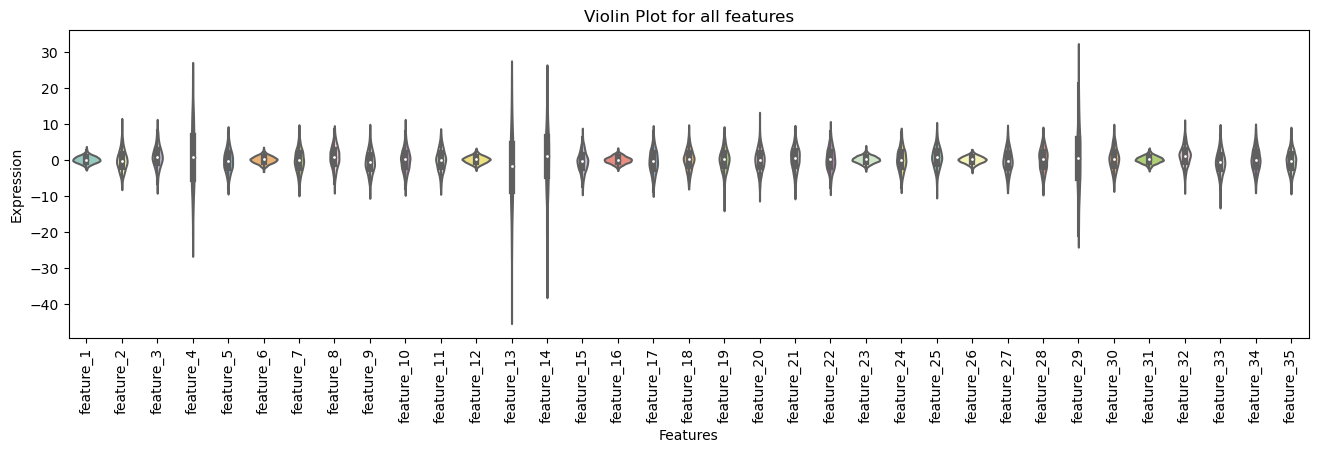

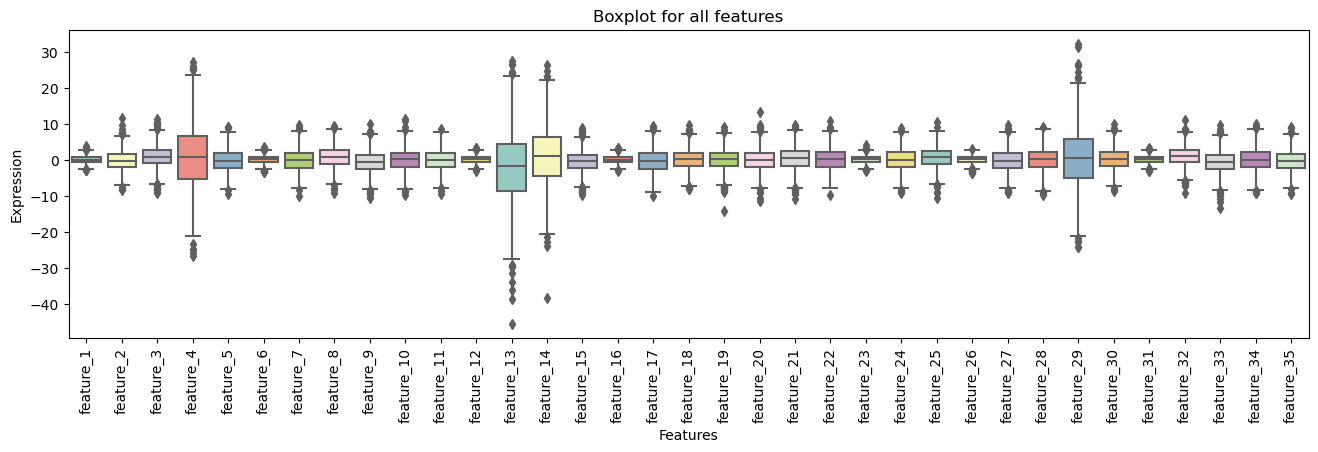

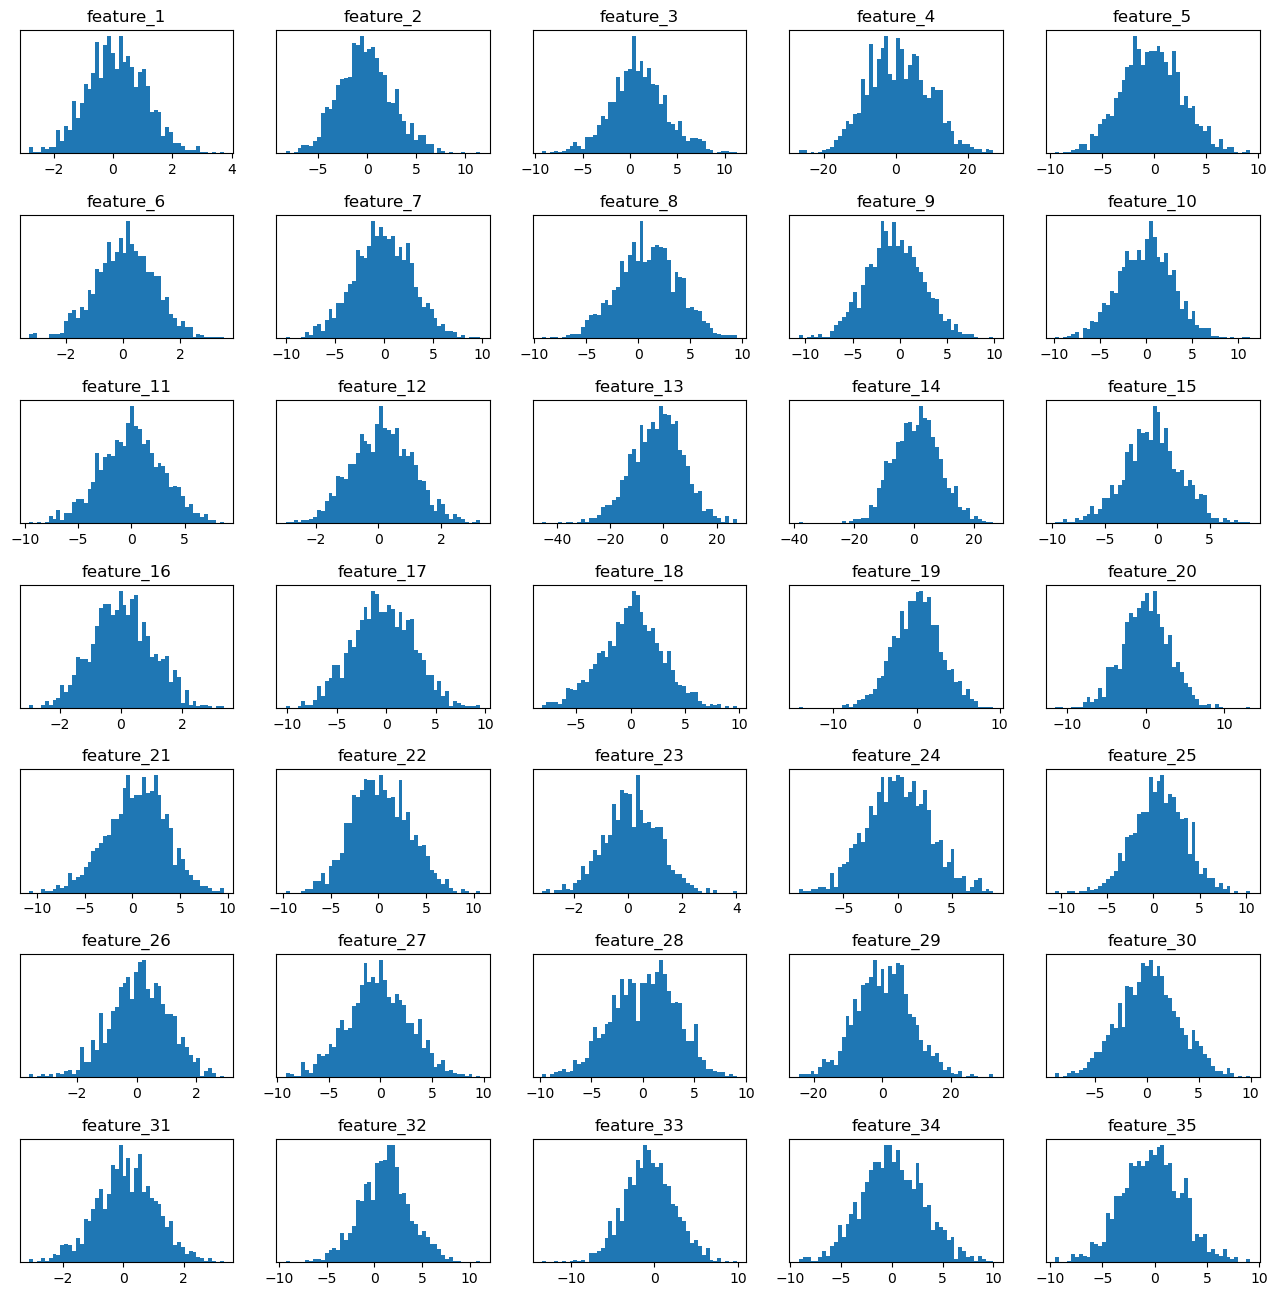

In [345]:
# Create Violin Plots for each feature

np.shape(dfx)
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=dfx,palette="Set3",cut=0).set_title("Violin Plot for all features")
plt.xlabel("Features")
plt.ylabel("Expression")
plt.xticks(rotation=90)
plt.show()

# Creat a boxplot for each feature

plt.figure(figsize=(16,4))
plot=sns.boxplot(data=dfx,palette="Set3").set_title("Boxplot for all features")
plt.xlabel("Features")
plt.ylabel("Expression")
plt.xticks(rotation=90)
plt.show()

# Create a histogram for all 35 features individually three per row

fig, axes = plt.subplots(7, 5, figsize=(16, 16))
for i, ax in enumerate(axes.ravel()):
    ax.hist(dfx.iloc[:, i], bins=50)
    ax.set_title(dfx.columns[i])
    ax.set_yticks(())

plt.subplots_adjust(hspace=0.5)
plt.show()

### Outlier Detection

35


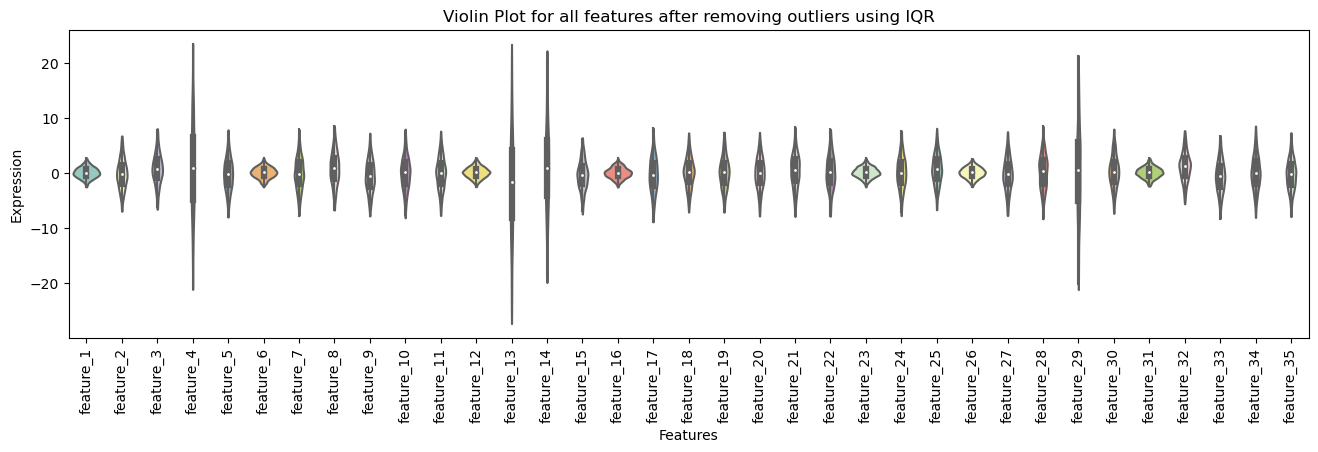

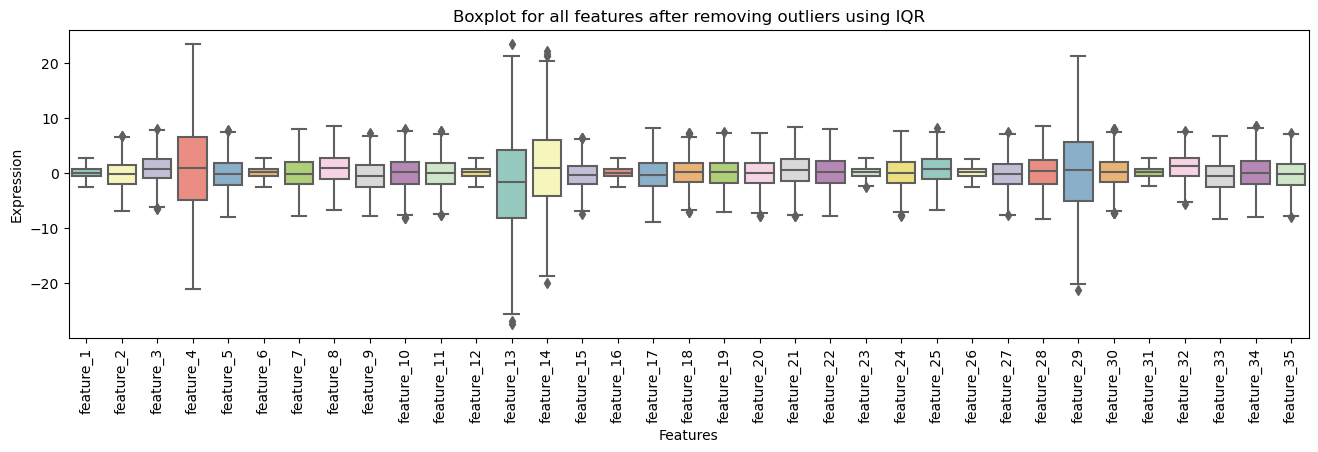

Number of outliers: 304


In [346]:
# Detect Outlier using IQR

Q1 = dfx.quantile(0.25)
Q3 = dfx.quantile(0.75)
IQR = Q3 - Q1

print(len(IQR))

# Remove Outliers

dfx_out = dfx[~((dfx < (Q1 - 1.5 * IQR)) |(dfx > (Q3 + 1.5 * IQR))).any(axis=1)]

# Create Violin Plots for each feature after removing outliers

np.shape(dfx_out)
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=dfx_out,palette="Set3",cut=0).set_title("Violin Plot for all features after removing outliers using IQR")
plt.xlabel("Features")
plt.ylabel("Expression")
plt.xticks(rotation=90)
plt.show()

# Create a boxplot for each feature after removing outliers

plt.figure(figsize=(16,4))
plot=sns.boxplot(data=dfx_out,palette="Set3").set_title("Boxplot for all features after removing outliers using IQR")
plt.xlabel("Features")
plt.ylabel("Expression")
plt.xticks(rotation=90)
plt.show()

# Count the number of outliers

print("Number of outliers:", len(dfx) - len(dfx_out))


Since it is unlikely that 304 out of 1300 samples are outliers, we continue with the original dataset.

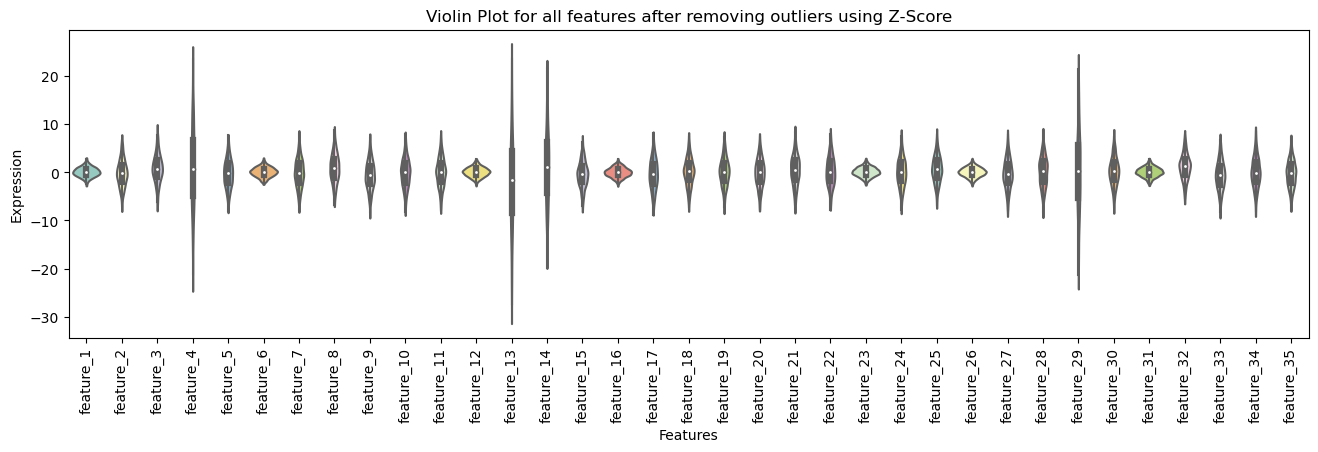

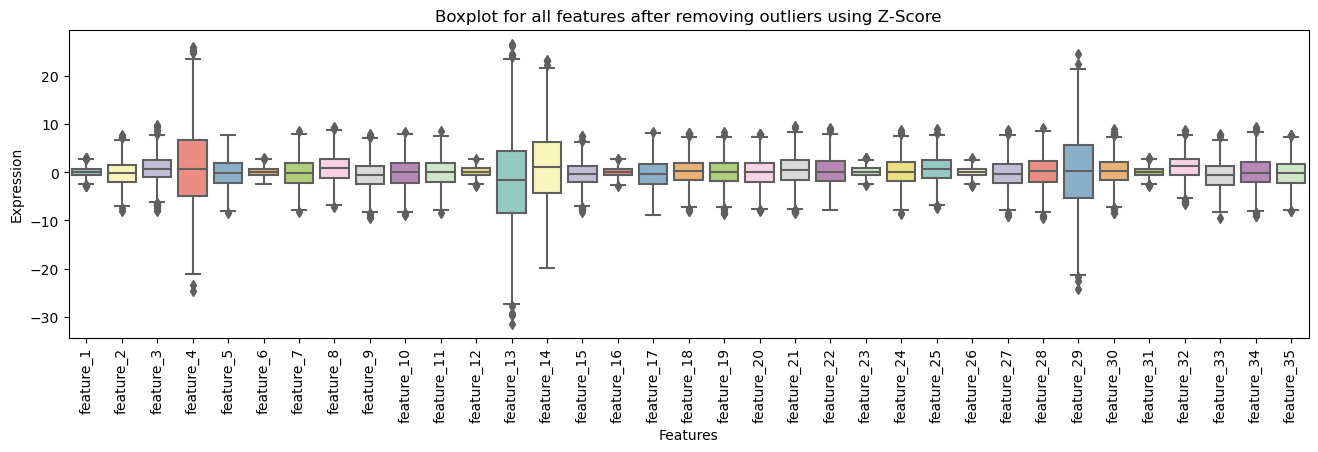

Number of outliers: 124


In [347]:
# Outlier Detection using Z-Score

z = np.abs(stats.zscore(dfx))
threshold = 3

# Remove Outliers

dfx_out2 = dfx[(z < 3).all(axis=1)]

# Create a violinplot for all 35 features after removing outliers

np.shape(dfx_out2)
plt.figure(figsize=(16,4))
plot=sns.violinplot(data=dfx_out2,palette="Set3",cut=0).set_title("Violin Plot for all features after removing outliers using Z-Score")
plt.xlabel("Features")
plt.ylabel("Expression")
plt.xticks(rotation=90)
plt.show()

# Create a boxplot for all 35 features after removing outliers

plt.figure(figsize=(16,4))
plot=sns.boxplot(data=dfx_out2,palette="Set3").set_title("Boxplot for all features after removing outliers using Z-Score")
plt.xlabel("Features")
plt.ylabel("Expression")
plt.xticks(rotation=90)
plt.show()

# Count the number of outliers

print("Number of outliers:", len(dfx) - len(dfx_out2))

# Delete the corresponding rows in the label dataset

dfy_out2 = dfy[(z < 3).all(axis=1)]



This number of outliers seems more reasonable. However, since we assume that this is a normally generated dataset, it does seem sensible to remove this data when training our classifier. Therefore I will continue using the original dataset.

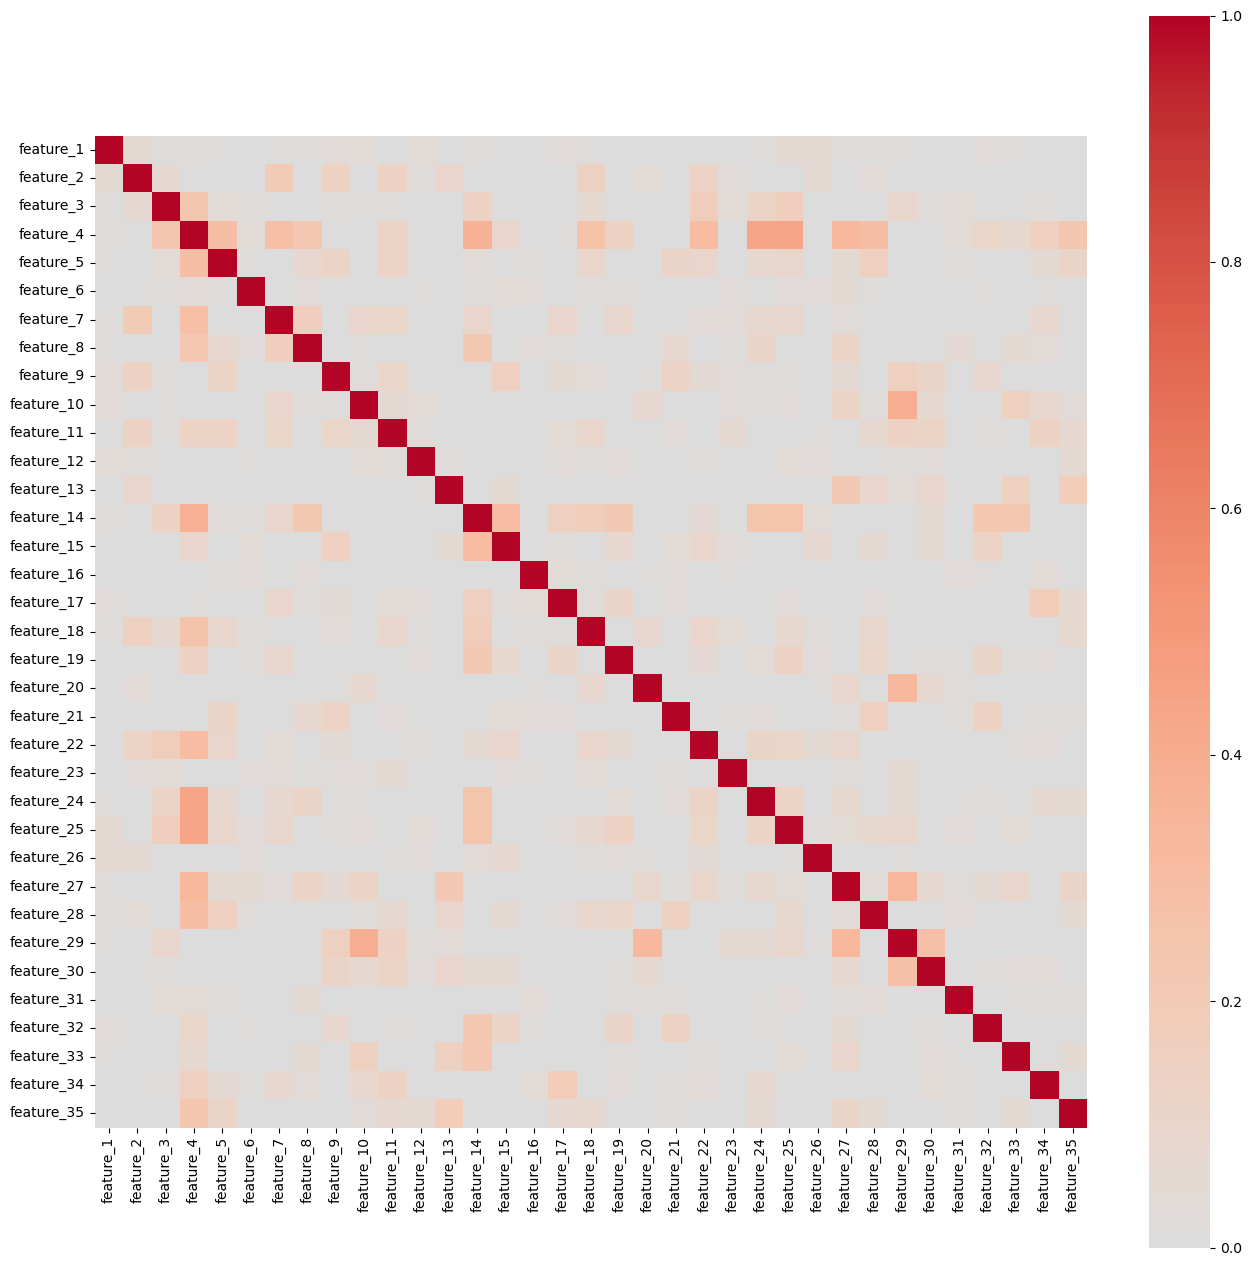

In [348]:
# Creat a heatmap for the correlation between the features

plt.figure(figsize=(16, 16))
sns.heatmap(dfx.corr(), annot=False, square=True, cmap='coolwarm', vmin=0, vmax=1, center=0)
plt.show()


This is a good result which tells us, that very few features bare any correlation, meaning that we have a meaningfull dataset.

## The Models

### Data Preparation

In [349]:
# Split the dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.2, random_state=42)


# Scale the data

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)


### KNN Initial Model with no hyperparameter tuning

0.8115384615384615
[[ 98  30]
 [ 19 113]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       128
           1       0.79      0.86      0.82       132

    accuracy                           0.81       260
   macro avg       0.81      0.81      0.81       260
weighted avg       0.81      0.81      0.81       260



/Users/casparlehmkuhler/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


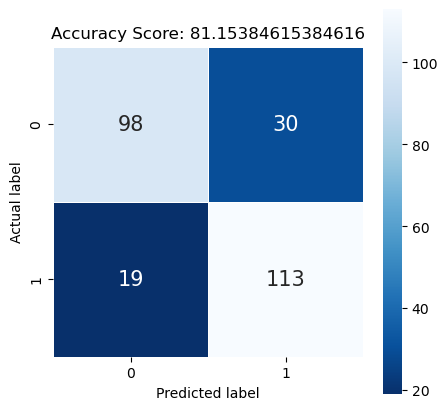

[0.59615385 0.66346154 0.51923077 0.61538462 0.68269231 0.55769231
 0.55769231 0.70192308 0.67307692 0.69230769]
0.6259615384615385
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [350]:
# Train the data

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train the model

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions

y_pred = knn.predict(X_test)

# Print Accuracy Score

print(accuracy_score(y_test, y_pred))

# Evaluate the algorithm

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot the confusion matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r', annot_kws={"size": 15})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred)*100))
plt.show()

# Cross Validation Score

scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

# Print which parameters were used by the model

print(knn.get_params())


### Analysis of the value of the number of neighbors parameter

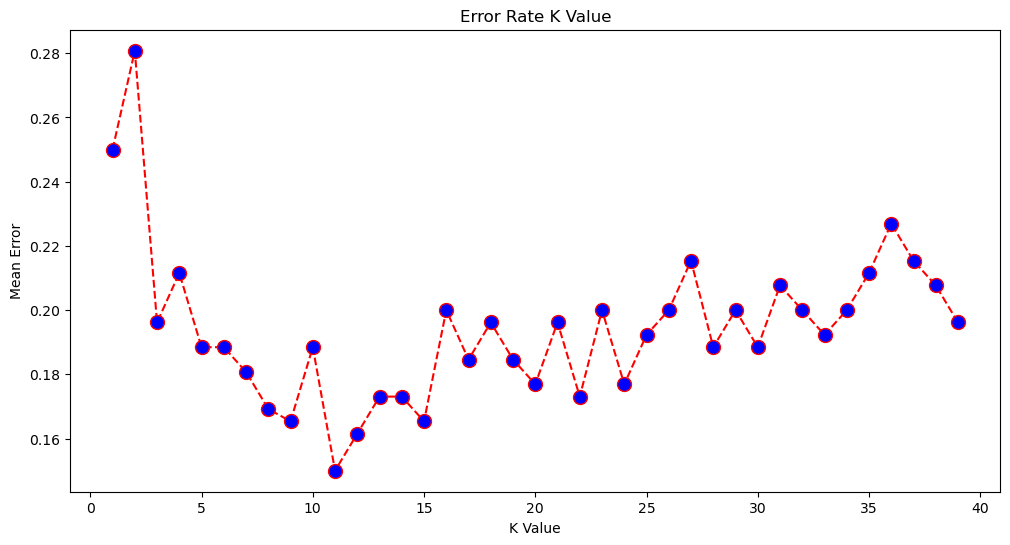

In [351]:
# Plot number of neighbors vs accuracy
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
            markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()


### Hyperparameter Tuning

Best Crossvalidation Score: 0.760576923076923
[[ 96  32]
 [ 27 105]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       128
           1       0.77      0.80      0.78       132

    accuracy                           0.77       260
   macro avg       0.77      0.77      0.77       260
weighted avg       0.77      0.77      0.77       260

Best parameters for KNN:  {'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}


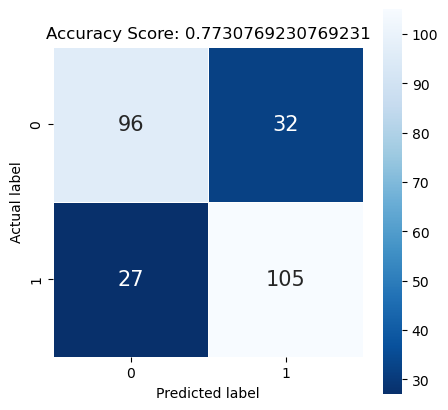

In [352]:
knn = KNeighborsClassifier()

# Define the grid of hyperparameters 'param_grid'
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'leaf_size': [10, 20, 30, 40, 50]
}

# Grid search
knn_gscv = GridSearchCV(knn, param_grid, cv=10) # 'cv' is the cross-validation parameter

# Fit the model
knn_gscv.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_gscv.predict(X_test)

# Print the best parameters and the best score
knn_best_params = knn_gscv.best_params_
knn_best_score = knn_gscv.best_score_
print("Best Crossvalidation Score: " + knn_best_score.astype(str))

# Print the confusion matrix and classification report to see the model's performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Best parameters for KNN: ", knn_gscv.best_params_)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r', annot_kws={"size": 15})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred)))
plt.show()

After using Gridsearch to find the optimal set of paramters, we find that the default KNN parameters provide an optimal model for this dataset in terms of accuracy. The accuracy after tuning the hyperparameters is in fact lower than the one of the default parameters. This is due to the fact that Gridsearch uses crossvalidation as its metric meaning that the result can slightly differ. Logically, the crossvalidation score, of the model with tuned hyperparameters is therefore higher (from previously 0.70 to 0.76 now).

The parameters which I tuned are:

leaf_size: This parameter affects the speed of the construction and query time of the tree in the underlying BallTree or KDTree used in the KNN algorithm, where a smaller leaf size makes the tree more compact at the cost of longer construction time.

metric: This parameter determines the distance function used for measuring the distance between instances, with options often including Euclidean, Manhattan, and Minkowski distances, among others.

n_neighbors: This defines the number of nearest neighbors to consider when making a prediction; the target is predicted based on the majority class among its 'n_neighbors' nearest neighbors.

weights: This parameter controls how the K-nearest neighbors are weighted when making a prediction, with options typically including 'uniform' (all neighbors are weighted equally), and 'distance' (closer neighbors have a greater influence).

### KNN Final Model

We see that the KNN model makes a fairly accurate prediction of our data. However it also shows a large standard deviation in the crossvalidation.

In [353]:
# KNN final model

knn_final = KNeighborsClassifier(**knn_best_params)
knn_final.fit(X_train, y_train)
y_pred = knn_final.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy Score: " + accuracy_score(y_test, y_pred).astype(str))

# Cross validation score

knn_final_score = cross_val_score(knn_final, X_train, y_train, cv=10)
print("Crossvalidation: %0.5f %% (+/- %0.5f %%)" % (knn_final_score.mean()*100, knn_final_score.std()*100*2))

[[ 96  32]
 [ 27 105]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       128
           1       0.77      0.80      0.78       132

    accuracy                           0.77       260
   macro avg       0.77      0.77      0.77       260
weighted avg       0.77      0.77      0.77       260

Accuracy Score: 0.7730769230769231
Crossvalidation: 76.05769 % (+/- 7.99639 %)


## Random Forest Model

### Random Forest Untuned Model

Accuracy: 0.8461538461538461
Crossvalidation: 82.50000 % (+/- 6.92308 %)
[[114  14]
 [ 26 106]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       128
           1       0.88      0.80      0.84       132

    accuracy                           0.85       260
   macro avg       0.85      0.85      0.85       260
weighted avg       0.85      0.85      0.85       260



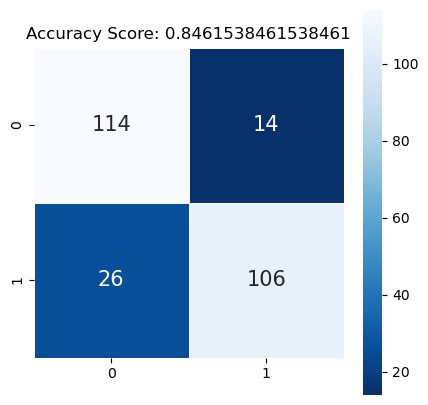

In [354]:
# Split the dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.2, random_state=42)

# Initiate the Random Forest Classifier
rfc = RandomForestClassifier()

# Fit the model to the data
rfc.fit(X_train, y_train)

# Predict on the test set
y_pred = rfc.predict(X_test)


# Print Accuracy Score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: " + accuracy.astype(str))

# Cross validation score

rfc_score = cross_val_score(rfc, X_train, y_train, cv=10)
print("Crossvalidation: %0.5f %% (+/- %0.5f %%)" % (rfc_score.mean()*100, rfc_score.std()*100*2))

# Print the confusion matrix and classification report to see the model's performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred)))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r', annot_kws={"size": 15})
plt.show()


Here we ran a basic random forest model both on the dataset with default parameters.
While this gives us a decent accuracy score, we will now move on to tuning Hyperparameters in order to achieve maximum performance.

### Random Forest Hyperparameter Search

First we look at the importance of the number of trees vs the accuracy of the model

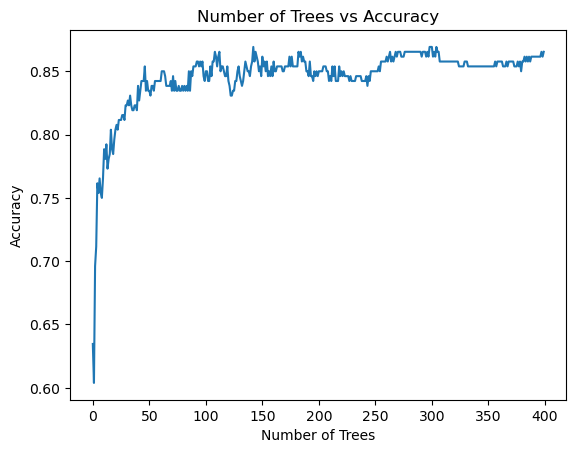

In [355]:
# Plot Number of Trees vs accuracy

trees = range(400)
accuracy = np.zeros(400)

# Plot the accuracy for different tree depths

for idx in range(len(trees)):
    classifier = RandomForestClassifier(n_estimators=idx+1, random_state=42)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy[idx] = accuracy_score(y_test, y_pred)
    

plt.plot(trees, accuracy)
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Number of Trees vs Accuracy")
plt.show()

Now lets move on to actually tuning the parameter. From these graphs we assume that the optimal value of trees is around 300. Let us now check this assumption (Clearly it does not take into account any other change in parameters).

In [356]:
# Find the best parameters for the Random Forest Classifier

rfc = RandomForestClassifier(random_state=42)

# Parameters to try

param_distributions = {
    'n_estimators': [100, 200, 300, 350, 400, 500],
    'max_depth': [2, 5, 10, None],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'bootstrap': [True, False],
    #'criterion': ['gini', 'entropy']
}

# Grid search

rfc_rscv = GridSearchCV(rfc, param_distributions, cv=5)

# Fit the model

rfc_rscv.fit(X_train, y_train)

# Predict on the test set

y_pred = rfc_rscv.predict(X_test)



In [357]:
# Hyperparamter Tuning Results

rfc_best_params = rfc_rscv.best_params_
print("Best parameters for Random Forest: " , rfc_rscv.best_params_)

rfc_best_score = rfc_rscv.best_score_
print("Crossvalidation: %0.5f " % (rfc_best_score.mean()*100))

Best parameters for Random Forest:  {'max_depth': None, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 350}
Crossvalidation: 82.78846 


While it is possible to tune even more hyperparameters, this would be too computationally intense, which is why I decided to stick to only four. Some other possible Hyperparameters are commented out in the parameter grid. We can see that the crossvalidation has actually slightly dropped, which is a surprising result, however, at the same time as we see in the next section, the standard deviation has also dropped significantly (from around 6.9% to 3.6%) and the overall accuracy increases drastically (from ). Overall we can see that there is a correlation between a lower standard deviation for the crossvalidation and a lower best accuracy. Since our model scores only 0.6% worse after hyperparameter tuning, we will use the tuned version from here on out.

The four parameters I decided to optimise are the following:

Max_Depth: This determines the maximum number of levels each tree in the forest can have, essentially limiting the complexity of the individual decision trees.

Max_Features: This defines the maximum number of features that are considered when looking for the best split while building the tree.

Min_Samples_Split: This represents the minimum number of samples required to split an internal node, with higher values leading to less complex decision trees.

N_Estimators: This parameter specifies the number of trees in the forest of the model, with a larger number typically improving the model's performance at the cost of computational complexity.

Let us now run the model again on the optimal parameters found above.

### Random Forest Final Model

Best parameters for Random Forest:  {'max_depth': None, 'max_features': 'auto', 'min_samples_split': 5, 'n_estimators': 350}
Crossvalidation 81.63462 % (+/- 3.56678 %)
Accuracy: 0.8384615384615385
[[110  18]
 [ 24 108]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       128
           1       0.86      0.82      0.84       132

    accuracy                           0.84       260
   macro avg       0.84      0.84      0.84       260
weighted avg       0.84      0.84      0.84       260



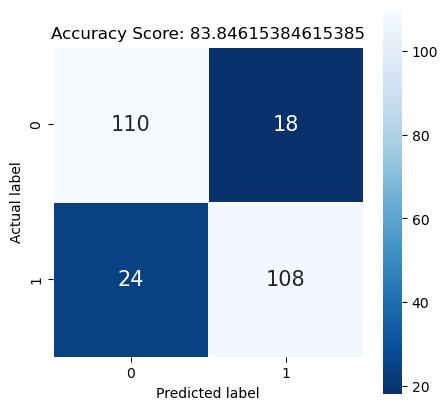

In [358]:
# Initiate the Random Forest Classifier with a specified number of trees
print("Best parameters for Random Forest: ", rfc_rscv.best_params_)
rfc = RandomForestClassifier(**rfc_best_params)

# Fit the model to the data
rfc.fit(X_train, y_train)

# Predict on the test set
y_pred = rfc.predict(X_test)

# Run Cross Validation
scores_final = cross_val_score(rfc, X_train, y_train, cv=5)
print("Crossvalidation %0.5f %% (+/- %0.5f %%)" % (scores_final.mean()*100, scores_final.std() *100* 2))

# Print Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: " + accuracy.astype(str))

# Print the confusion matrix and classification report to see the model's performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r', annot_kws={"size": 15})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred)*100))
plt.show()


Our final model performs better than out final KNN Model. This result was expected since KNN is mainly used for low dimensional data. Therefore, we choose 

 In the next steps we will show the importance of individual features for the classifier before we move on to making our final prediction.

### Plot feature importance

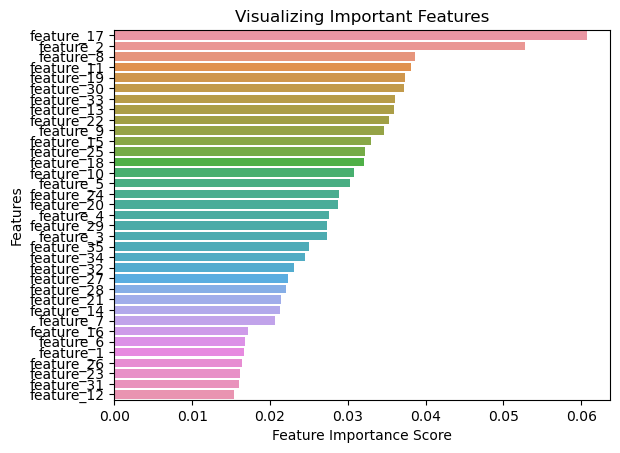

In [359]:
# Plot the feature importance

feature_imp = pd.Series(rfc.feature_importances_, index=dfx.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Results and Prediction on Anonymous Testset

We can see, that when running the model multiple times, that the best classifier is given by the Random Forest Model after Hyperparameter Tuninng. While the overall accuracy of this model is actually lower than the one with default parameters, it has a lower standard deviation, making it a safer bet for unseen testsets. We detected an accuracy of around 84% and expect a similar result in our predictions.

In [362]:
# Download Dataset for Predictions

test_feature_dataset = pd.read_csv(path + "mldata_0003184402.TEST_FEATURES.csv", index_col=0)

#Split the data into features and target and test it on the optimal random forest classifier

X_Train, Y_Train = dfx, dfy

X_Test = test_feature_dataset

# Initiate the Random Forest Classifier with a specified number of trees
rfc = RandomForestClassifier(**rfc_best_params)

# Define the grid of hyperparameters 'param_grid'
param_grid = {
    'n_estimators': [100, 200, 300, 350, 400, 500],
    'max_depth': [2, 5, 10, None],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'bootstrap': [True, False],
    #'criterion': ['gini', 'entropy']
}


# Initiate the Grid Search Model
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the Grid Search Model to the training data
grid_search.fit(X_Train, Y_Train)

# Make predictions on the test data
y_pred = grid_search.predict(X_Test)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [364]:
# Format data for export

test_feature_dataset_export = pd.DataFrame(y_pred, columns=['Predicted'])

np.savetxt("test_predictions.txt", test_feature_dataset_export, fmt='%s')

# Count number of 1's and 0's in the predictions

print(test_feature_dataset_export['Predicted'].value_counts())

0    653
1    647
Name: Predicted, dtype: int64
